Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")


Data Understanding & Initial Exploration:

In [2]:
# Loading the dataset
data = pd.read_excel("PSP_Jan_Feb_2019.xlsx")


In [3]:
print("Shape of the dataset:")
print(data.shape)


Shape of the dataset:
(50410, 8)


In [4]:
print("First 10 Row of dataset")
data.head(10)


First 10 Row of dataset


,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners
5,5,2019-01-01 00:06:41,Switzerland,282,0,UK_Card,0,Master
6,6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master
7,7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master
8,8,2019-01-01 00:09:56,Switzerland,174,0,Simplecard,0,Visa
9,9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa


In [5]:
print("Info about of dataset:")
print(data.info())


Info about of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB
None


In [6]:
print("Basic statistics for numerical columns:")
numerical_stats = data[["amount", "success", "3D_secured"]].describe()
print(numerical_stats)


Basic statistics for numerical columns:
             amount       success    3D_secured
count  50410.000000  50410.000000  50410.000000
mean     202.395715      0.202896      0.238266
std       96.274730      0.402160      0.426027
min        6.000000      0.000000      0.000000
25%      133.000000      0.000000      0.000000
50%      201.000000      0.000000      0.000000
75%      269.000000      0.000000      0.000000
max      630.000000      1.000000      1.000000


In [7]:
print("Basic statistics for categorical columns:")
categorical_stats = data[["country", "PSP", "card"]].describe(include="object")
print(categorical_stats)


Basic statistics for categorical columns:
        country      PSP    card
count     50410    50410   50410
unique        3        4       3
top     Germany  UK_Card  Master
freq      30233    26459   29002


Data Cleaning & Pre-processing:

In [8]:
data.drop(columns=["Unnamed: 0"], inplace=True)
print("Dropped the unnecessary first column of the dataset")


Dropped the unnecessary first column of the dataset


In [9]:
print("Processed Data (First 5 Rows)")
data.head(5)


Processed Data (First 5 Rows)


,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [10]:
missing_values_check = data.isnull().sum()
print("Missing Values Check:\n", missing_values_check)


Missing Values Check:
 tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64



Percentage of Transactions Considered Outliers: 0.30351120809363225 %


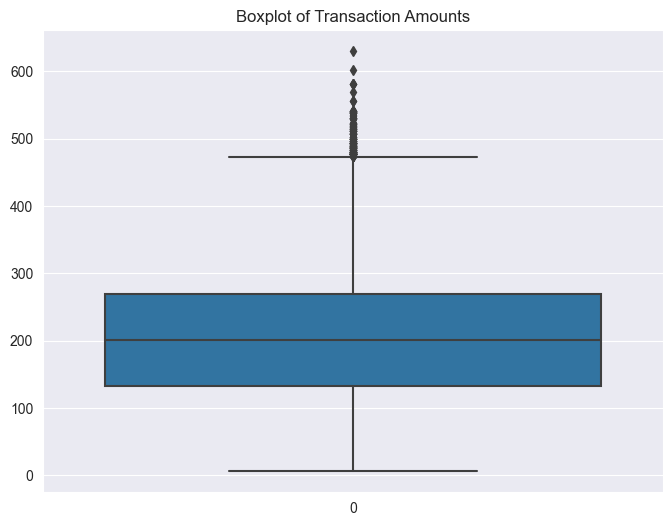

In [11]:
# Address Potential Outliers
# Checking for outliers in the 'amount' column using the IQR method
Q1 = data["amount"].quantile(0.25)
Q3 = data["amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = data[(data["amount"] < lower_bound) | (data["amount"] > upper_bound)]
percentage_outliers = len(outliers) / len(data) * 100

print("\nPercentage of Transactions Considered Outliers:", percentage_outliers, "%")

# Identifying potential anomalies for 'amount' column
plt.figure(figsize=(8, 6))
sns.boxplot(data["amount"])
plt.title("Boxplot of Transaction Amounts")
plt.show()


Pre-Feature Engineering EDA:

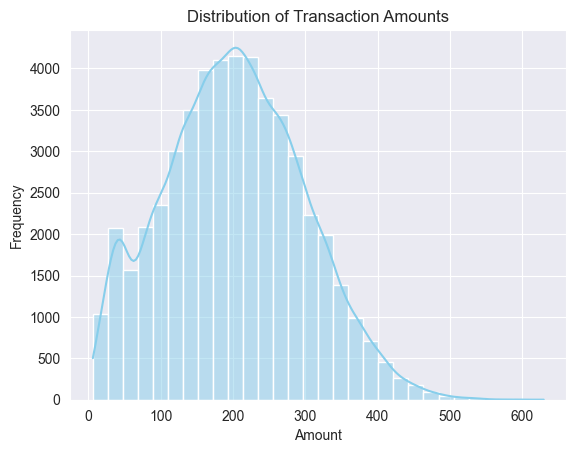

In [12]:
sns.histplot(data["amount"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


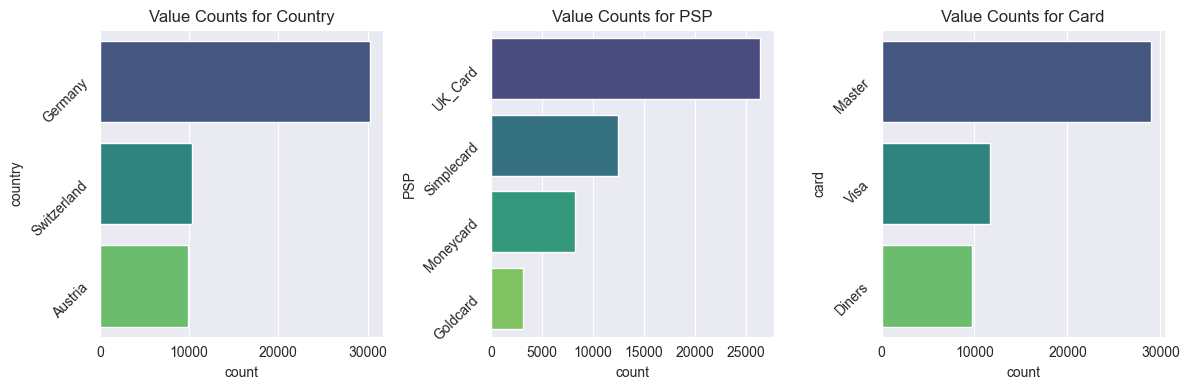

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plotting the 'country' bar chart on the first subplot
sns.countplot(
    data=data,
    y="country",
    order=data["country"].value_counts().index,
    ax=axes[0],
    palette="viridis",
)
axes[0].set_title("Value Counts for Country")
axes[0].tick_params(axis="y", rotation=45)

# Plotting the 'PSP' bar chart on the second subplot
sns.countplot(
    data=data,
    y="PSP",
    order=data["PSP"].value_counts().index,
    ax=axes[1],
    palette="viridis",
)
axes[1].set_title("Value Counts for PSP")
axes[1].tick_params(axis="y", rotation=45)

# Plotting the 'card' bar chart on the third subplot
sns.countplot(
    data=data,
    y="card",
    order=data["card"].value_counts().index,
    ax=axes[2],
    palette="viridis",
)
axes[2].set_title("Value Counts for Card")
axes[2].tick_params(axis="y", rotation=45)

plt.tight_layout()
plt.show()


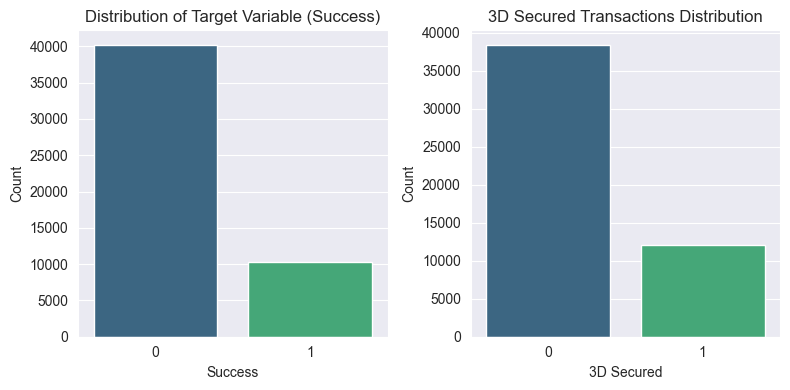

In [14]:
plt.figure(figsize=(8, 4))

# Distribution of Target Variable (Success)
plt.subplot(1, 2, 1)
sns.countplot(x=data["success"], palette="viridis")
plt.title("Distribution of Target Variable (Success)")
plt.xlabel("Success")
plt.ylabel("Count")

# 3D Secured Transactions Distribution
plt.subplot(1, 2, 2)
sns.countplot(x=data["3D_secured"], palette="viridis")
plt.title("3D Secured Transactions Distribution")
plt.xlabel("3D Secured")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


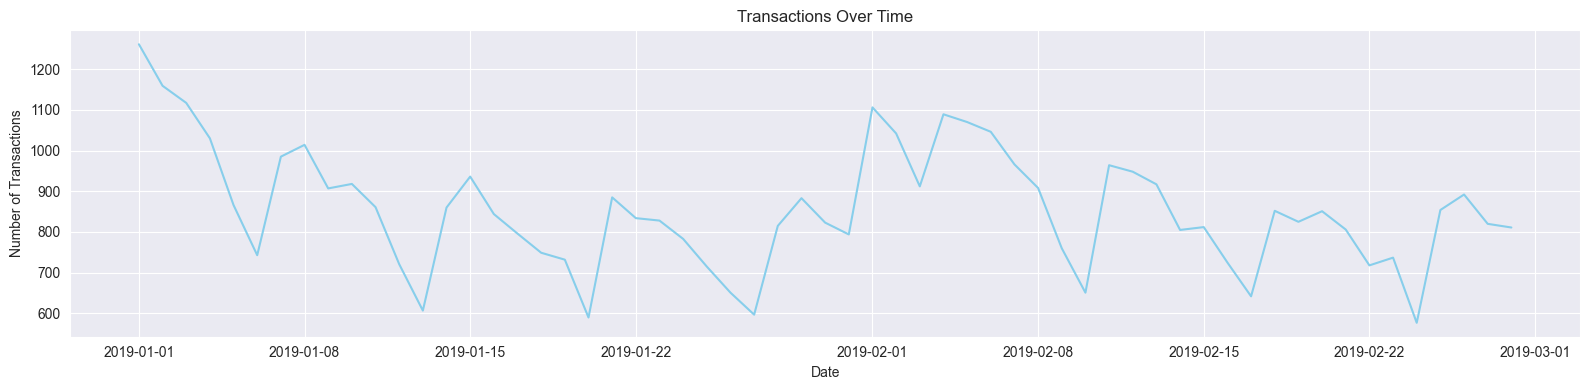

In [15]:
data["tmsp"] = pd.to_datetime(data["tmsp"])

# Group by date and count the number of transactions for each day
daily_transactions = data.groupby(data["tmsp"].dt.date).size()

# Plotting transactions over time
plt.figure(figsize=(16, 4))
daily_transactions.plot(color="skyblue")
plt.title("Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()


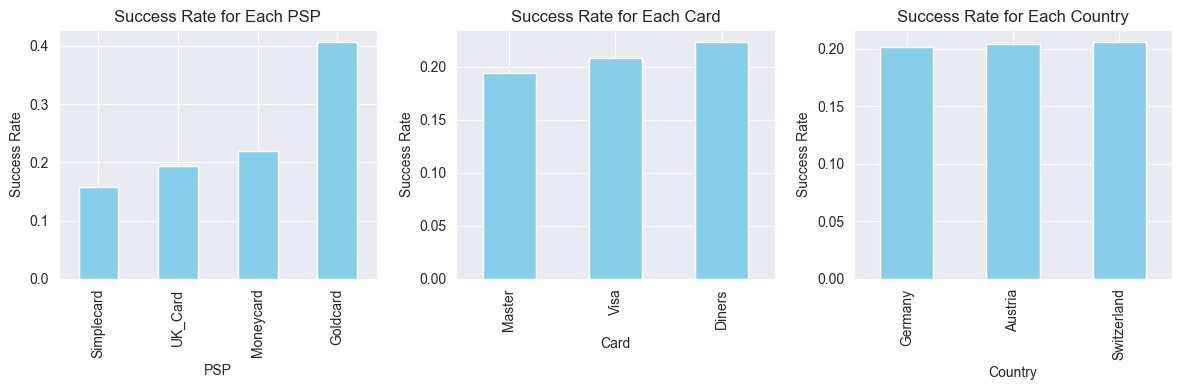

In [16]:
plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Calculate the success rate for each PSP
psp_success_rate = data.groupby("PSP")["success"].mean()
# Plotting the success rate for each PSP
plt.subplot(1, 3, 1)
psp_success_rate.sort_values().plot(kind="bar", color="skyblue")
plt.title("Success Rate for Each PSP")
plt.xlabel("PSP")
plt.ylabel("Success Rate")

# Calculate the success rate for each card
card_success_rate = data.groupby("card")["success"].mean()
# Plotting the success rate for each card
plt.subplot(1, 3, 2)
card_success_rate.sort_values().plot(kind="bar", color="skyblue")
plt.title("Success Rate for Each Card")
plt.xlabel("Card")
plt.ylabel("Success Rate")

# Calculate the success rate for each country
country_success_rate = data.groupby("country")["success"].mean()
# Plotting the success rate for each country
plt.subplot(1, 3, 3)
country_success_rate.sort_values().plot(kind="bar", color="skyblue")
plt.title("Success Rate for Each Country")
plt.xlabel("Country")
plt.ylabel("Success Rate")


plt.tight_layout()
plt.show()

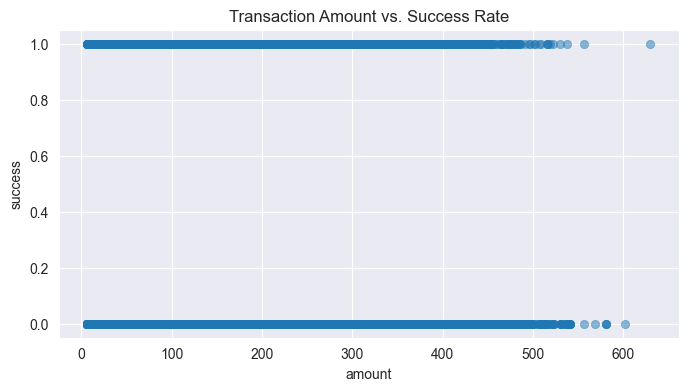

In [17]:
# Transaction Amount vs. Success Rate
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data["amount"], y=data["success"], alpha=0.5, edgecolor=None)
plt.title("Transaction Amount vs. Success Rate")
plt.show()


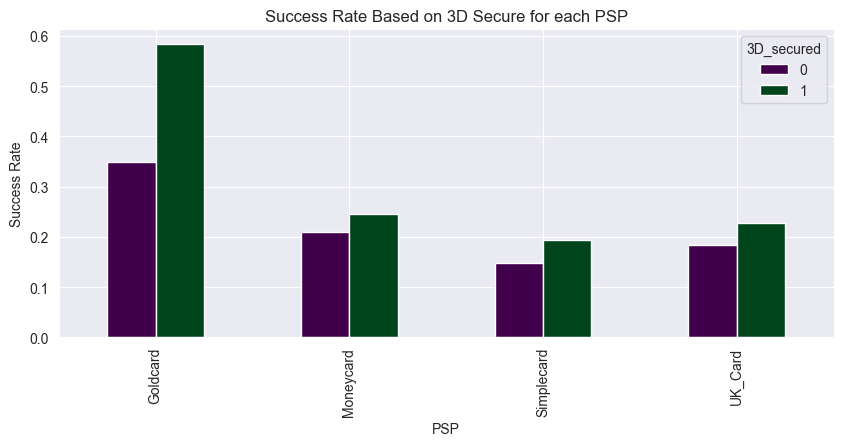

In [18]:
# Success Rate Based on 3D Secure for each PSP
psp_3d_secure_rates = data.groupby(["PSP", "3D_secured"])["success"].mean().unstack()
psp_3d_secure_rates.plot(kind="bar", figsize=(10, 4), colormap="PRGn")
plt.title("Success Rate Based on 3D Secure for each PSP")
plt.ylabel("Success Rate")
plt.show()


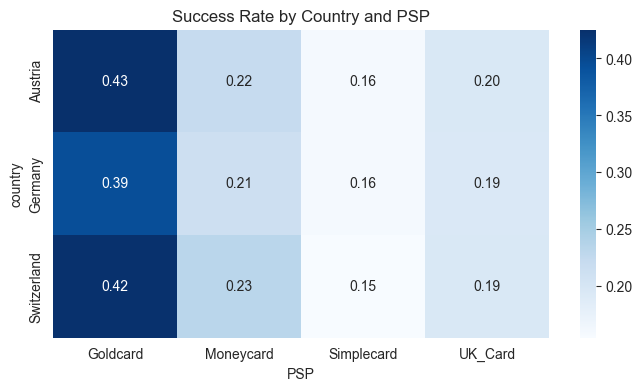

In [19]:
# Country vs. PSP
country_psp_success = data.groupby(["country", "PSP"])["success"].mean().unstack()
plt.figure(figsize=(8, 4))
sns.heatmap(country_psp_success, cmap="Blues", annot=True, fmt=".2f")
plt.title("Success Rate by Country and PSP")
plt.show()


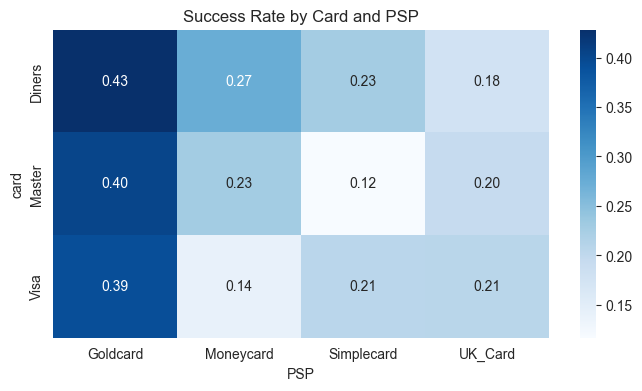

In [20]:
# Card vs. PSP
card_psp_success = data.groupby(["card", "PSP"])["success"].mean().unstack()
plt.figure(figsize=(8, 4))
sns.heatmap(card_psp_success, cmap="Blues", annot=True, fmt=".2f")
plt.title("Success Rate by Card and PSP")
plt.show()


In [21]:
# Fee structure
fees = {
    "Moneycard": {"success": 5, "fail": 2},
    "Goldcard": {"success": 10, "fail": 5},
    "UK_Card": {"success": 3, "fail": 1},
    "Simplecard": {"success": 1, "fail": 0.5},
}

# Transaction Fees Analysis
total_fees = {}
avg_fee_success = {}

for psp, fee in fees.items():
    total_fees[psp] = (
        data[(data["PSP"] == psp) & (data["success"] == 1)].shape[0] * fee["success"]
    ) + (data[(data["PSP"] == psp) & (data["success"] == 0)].shape[0] * fee["fail"])
    avg_fee_success[psp] = (
        total_fees[psp] / data[(data["PSP"] == psp) & (data["success"] == 1)].shape[0]
    )


fees_df = pd.DataFrame(
    {
        "PSP": list(total_fees.keys()),
        "Total Fees (€)": list(total_fees.values()),
        "Average Fee per Successful Transaction (€)": list(avg_fee_success.values()),
    }
)

fees_df.head()


,PSP,Total Fees (€),Average Fee per Successful Transaction (€)
0,Moneycard,22039.0,12.142700
1,Goldcard,22555.0,17.310054
2,UK_Card,36743.0,7.145663
3,Simplecard,7207.0,3.662093


In [22]:
avg_amount_psp = data.groupby("PSP")["amount"].mean().reset_index()
print("Average Transaction Amount by PSP:")
avg_amount_psp


Average Transaction Amount by PSP:


,PSP,amount
0,Goldcard,203.395574
1,Moneycard,201.892853
2,Simplecard,201.356661
3,UK_Card,202.920934


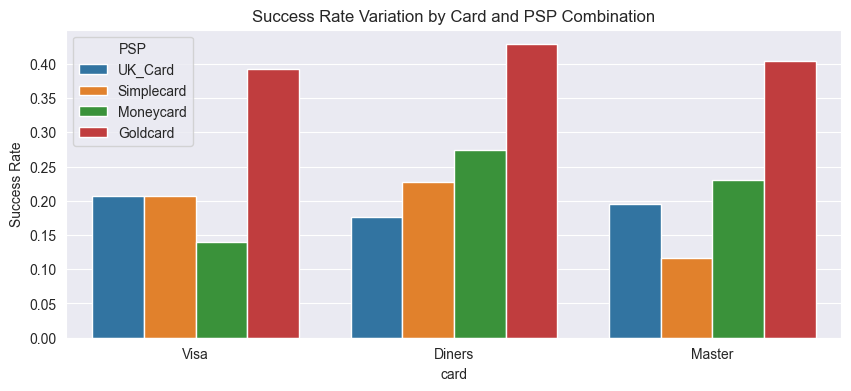

In [23]:
# Success Rate Variation by Card and PSP Combination
plt.figure(figsize=(10, 4))
sns.barplot(data=data, x="card", y="success", hue="PSP", errorbar=None)
plt.title("Success Rate Variation by Card and PSP Combination")
plt.ylabel("Success Rate")
plt.show()


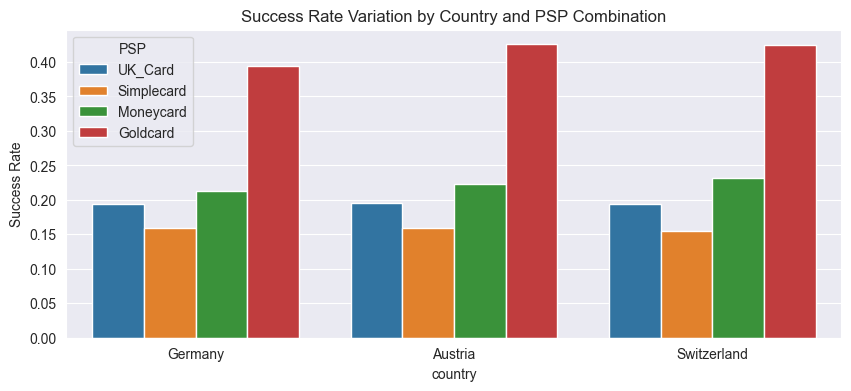

In [24]:
# Success Rate Variation by Country and PSP Combination
plt.figure(figsize=(10, 4))
sns.barplot(data=data, x="country", y="success", hue="PSP", errorbar=None)
plt.title("Success Rate Variation by Country and PSP Combination")
plt.ylabel("Success Rate")
plt.show()


In [25]:
# Aggregate Metrics by PSP
agg_metrics_psp = (
    data.groupby("PSP")
    .agg(
        total_transactions=("success", "size"),
        total_value=("amount", "sum"),
        successful_transactions=("success", "sum"),
        failed_transactions=("success", lambda x: len(x) - x.sum()),
    )
    .reset_index()
)
print("Aggregate Metrics by PSP:")
agg_metrics_psp


Aggregate Metrics by PSP:


,PSP,total_transactions,total_value,successful_transactions,failed_transactions
0,Goldcard,3208,652493,1303,1905
1,Moneycard,8297,1675105,1815,6482
2,Simplecard,12446,2506085,1968,10478
3,UK_Card,26459,5369085,5142,21317


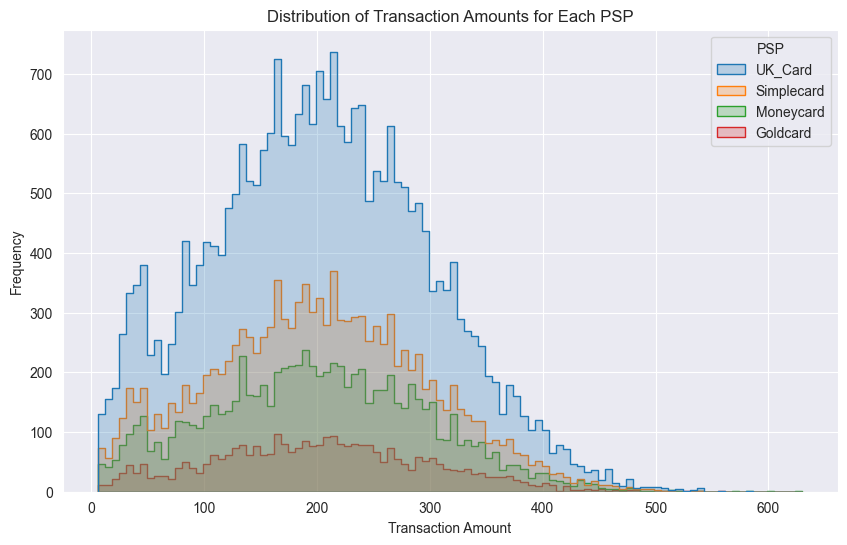

In [26]:
# Distribution of Transaction Amounts for each PSP
plt.figure(figsize=(10, 6))
sns.histplot(
    data=data, x="amount", hue="PSP", bins=100, element="step", common_norm=False
)
plt.title("Distribution of Transaction Amounts for Each PSP")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


Feature Engineering:

In [27]:
# Convert 'tmsp' column to datetime format
data["tmsp"] = pd.to_datetime(data["tmsp"])

# Extract hour, day, and day of the week from 'tmsp' column
data["hour"] = data["tmsp"].dt.hour
data["day"] = data["tmsp"].dt.day
data["day_of_week"] = data["tmsp"].dt.dayofweek  # Monday=0, Sunday=6
bins = [0, 6, 12, 18, 24]
labels = ["Night", "Morning", "Afternoon", "Evening"]
data["time_of_day"] = pd.cut(data["hour"], bins=bins, labels=labels, right=False)

In [28]:
# Sort the data by 'country', 'amount', and 'tmsp' to align potential repeated attempts sequentially
data = data.sort_values(by=["country", "amount", "tmsp"])

# Create a column 'time_diff' to calculate the time difference between consecutive transactions
data["time_diff"] = (
    data.groupby(["country", "amount"])["tmsp"].diff().dt.total_seconds()
)

# Binary feature to indicate if a transaction is a repeated attempt (within 60 seconds)
data["multiple_attempts"] = (data["time_diff"] <= 60).astype(int)

# Calculate retry count
data["retry_count"] = data.groupby(["country", "amount"])["multiple_attempts"].cumsum()

In [29]:
# 1. Calculate the historical success rate of each PSP
psp_success_rate = data.groupby("PSP")["success"].mean()
data["psp_success_rate"] = data["PSP"].map(psp_success_rate)

# 2. Calculate the success rate of transactions by card type
card_success_rate = data.groupby("card")["success"].mean()
data["card_success_rate"] = data["card"].map(card_success_rate)

# 3. Calculate the success rate of transactions that are 3D secured versus those that are not
secured_success_rate = data.groupby("3D_secured")["success"].mean()
data["secured_success_rate"] = data["3D_secured"].map(secured_success_rate)

In [30]:
# First, determine the quantiles of the 'amount' to decide on the bin edges
quantiles = data["amount"].quantile([0.25, 0.5, 0.75])

# Binning the 'amount' column based on the quantiles
bin_edges = [0] + list(quantiles) + [data["amount"].max() + 1]
bin_labels = ["Q1", "Q2", "Q3", "Q4"]
data["amount_bin"] = pd.cut(
    data["amount"], bins=bin_edges, labels=bin_labels, right=False
)

In [31]:
# Create an interaction feature between 'country' and 'PSP'
data["country_PSP_interaction"] = data["country"] + "_" + data["PSP"]

Advance EDA: